In [86]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Always make it pretty.
plt.style.use('ggplot')

# We get some interger -> float typecast warning from sklean below, this keeps them out of our hair.
import warnings
warnings.filterwarnings('ignore')

In [89]:
ATT = pd.read_csv('ATT1.csv')
#ngs_df = pd.read_csv('data/training.csv')

In [90]:
ATT

,date,open,high,low,close,volume
0,1984-07-19,1.0554,1.0576,1.0489,1.0489,934800
1,1984-07-20,1.0532,1.0599,1.0466,1.0510,1557600
2,1984-07-23,1.0466,1.0554,1.0378,1.0510,3313200
3,1984-07-24,1.0554,1.0666,1.0532,1.0599,1549200
4,1984-07-25,1.0599,1.0841,1.0576,1.0731,1828800
...,...,...,...,...,...,...
9185,2020-12-24,28.7300,28.7600,28.5000,28.6900,19153092
9186,2020-12-28,28.9300,28.9591,28.5000,28.5500,41575385
9187,2020-12-29,28.6900,28.8800,28.5100,28.5400,36544749
9188,2020-12-30,28.5400,28.6800,28.4300,28.4900,34302430


In [91]:
ATT['date'] = pd.to_datetime(ATT['date'], infer_datetime_format = True)

In [92]:
ATT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9190 entries, 0 to 9189
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    9190 non-null   datetime64[ns]
 1   open    9190 non-null   float64       
 2   high    9190 non-null   float64       
 3   low     9190 non-null   float64       
 4   close   9190 non-null   float64       
 5   volume  9190 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 430.9 KB


In [93]:
ATT = ATT.set_index('date')

In [94]:
close = ATT['close']

In [95]:
close

date
1984-07-19     1.0489
1984-07-20     1.0510
1984-07-23     1.0510
1984-07-24     1.0599
1984-07-25     1.0731
               ...   
2020-12-24    28.6900
2020-12-28    28.5500
2020-12-29    28.5400
2020-12-30    28.4900
2020-12-31    28.7600
Name: close, Length: 9190, dtype: float64

In [96]:
#diff
close_diff = close.diff()[1:]
test = sm.tsa.stattools.adfuller(close_diff)
print("ADF p-value for differenced close prices: {0:2.2f}".format(test[1]))

ADF p-value for differenced close prices: 0.00


Text(0.5, 1.0, 'AT&T Close Price detrend')

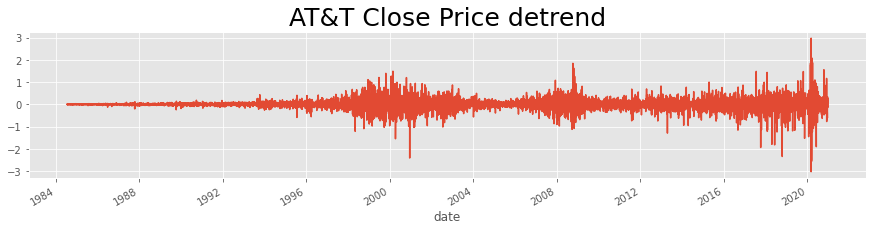

In [119]:
close_diff

fig, ax = plt.subplots(figsize = (15,3))
close_diff.plot(kind='line')
ax.set_title(f'AT&T Close Price detrend', fontsize = 25) 
# ax.set_ylabel('price (in $)', fontsize = 20)

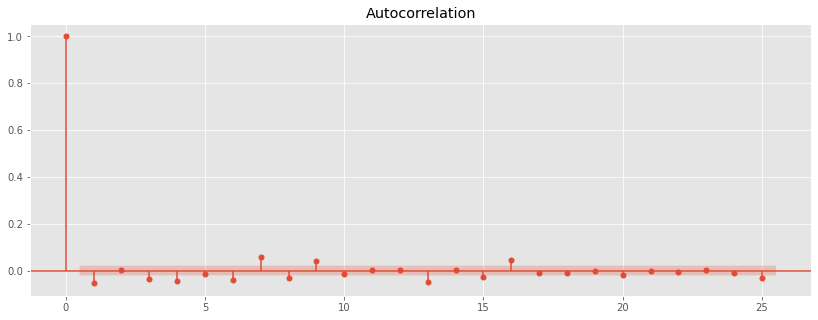

In [107]:
#MA
fig, ax = plt.subplots(1, figsize=(14, 5))
_ = sm.graphics.tsa.plot_acf(close_diff, lags=25, ax=ax)

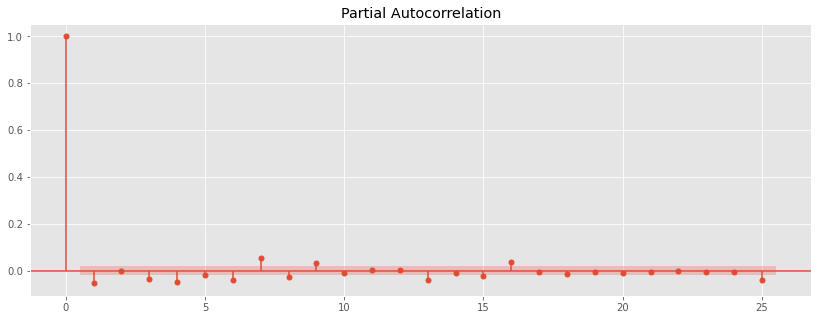

In [108]:
#PACF
fig, ax = plt.subplots(1, figsize=(14, 5))
_ = sm.graphics.tsa.plot_pacf(close_diff, lags=25, ax=ax)

In [99]:
train_size = int(len(close) * 0.9)
test_size = len(close) - train_size
train, test = close[0:train_size], close[train_size:len(ATT)]

print(train.shape,test.shape)

(8271,) (919,)


# ARIMA Modeling:

In [55]:
p=0
q=0
d=0
pdq=[]
aic=[]
for p in range(6):
    for d in range(2):
        for q in range(4):
            try:
                arima_mod=sm.tsa.ARIMA(train,(p,d,q)).fit(transparams=True)

                x=arima_mod.aic

                x1= p,d,q
                print (x1,x)

                aic.append(x)
                pdq.append(x1)
            except:
                pass



(0, 0, 0) 57979.194878479604
(0, 0, 1) 46836.54210845526
(0, 0, 2) 37195.04082467224
(0, 0, 3) 29837.95034032994
(0, 1, 0) -2236.841418693464
(0, 1, 1) -2242.3598236446196
(0, 1, 2) -2248.6769625326233
(0, 1, 3) -2252.94202142999
(1, 0, 0) -2225.013680711898
(1, 0, 1) -2230.308988431505
(1, 0, 2) -2236.37202076468
(1, 0, 3) -2240.4035873980974
(1, 1, 0) -2241.901841477549
(1, 1, 1) -2264.6664504787877
(1, 1, 2) -2263.5077755197453
(1, 1, 3) -2261.962581659802
(2, 0, 0) -2229.870973263787
(2, 0, 1) -2247.506785302423
(2, 0, 2) -2246.492200707082
(2, 0, 3) -2248.7705791415683
(2, 1, 0) -2247.40143847312
(2, 1, 1) -2263.5280045989784
(2, 1, 2) -2263.4259254769095
(2, 1, 3) -2259.8794777387157
(3, 0, 0) -2235.156359728673
(3, 0, 1) -2245.966987386546
(3, 0, 3) -2236.489592679176
(3, 1, 0) -2250.7462316658675
(3, 1, 1) -2262.0376233907045
(3, 1, 2) -2259.901376873957
(3, 1, 3) -2268.440286072917
(4, 0, 0) -2238.3192333119114
(4, 0, 1) -2245.022303381793
(4, 0, 2) -2234.8119871596828
(4, 0, 

In [122]:
close_model = ARIMA(train, order=(3, 1, 3)).fit()

In [101]:
close_model.params

const            0.003631
ar.L1.D.close    0.010298
ar.L2.D.close   -0.381381
ar.L3.D.close    0.774841
ma.L1.D.close   -0.048169
ma.L2.D.close    0.347164
ma.L3.D.close   -0.807469
dtype: float64

In [102]:
close_pred = close_model.forecast(steps=919)[0]

# Evaluate the ARIMA Model:

In [120]:
def RMSE(y_predict, y_actual):
    return np.sqrt(((y_predict - y_actual)**2).mean())

In [121]:
f'RMSE_ARIMA: {RMSE(close_pred,test)}'

'RMSE_ARIMA: 3.9038336539623018'